## <u>**Purpose of the assignment**</u><br>
## The purpose of the assignment is to familiarize you with the basic steps of the process followed for the application of data mining techniques, namely: pre-processing / cleaning, transformation, application of data mining techniques and evaluation. The implementation will be done in the Python programming language using the tools/libraries: jupyter notebook, pandas and SciKit Learn.

##<u>**Description**</u><br>
## **Customer Personality Analysis** is a detailed analysis of a company's ideal customers. It helps a business better understand its customers and makes it easier to modify products according to the specific needs, behaviors and concerns of different types of customers. For example, instead of spending money to promote a new product to every customer in the business' database , a business can analyze which customer category is most likely to buy the product and then promote the product only to that particular category.

# Import essential libraries


In [ ]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import sys


from datetime import date
from datetime import datetime
from datetime import timedelta

import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

import scipy.cluster.hierarchy as sch

# Mount gdrive to read data

In [ ]:
# Import google drive and define the path to the folder where the data is stored
from google.colab import drive

drive.mount('/content/gdrive')
PATH = '/content/gdrive/MyDrive/data_mining_data/'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


##<u>**Requirements**</u><br>
## 1. **Preprocessing/Cleanup**: Check for missing values in the data and handle them accordingly, convert date columns to DateTime objects and check for any dtype: object attributes that you can encode/convert in numerical values **(5%).**

# <u> **Question 1** </u><br>


In [ ]:
# csv -> dataframe
df = pd.read_csv(PATH+"marketing_campaign.csv", delimiter = "\t")

In [ ]:
# We will iterate over every numeric column and we will fill every empty value
# With the mean of that column and for every other categorical column will drop
# The row because we can't replace the missing value with a mean since they
# Are not numeric
for column in df.select_dtypes(include = ["int64", "float64"]):
  df = df.fillna(df[column].mean())
df = df.dropna()

In [ ]:
# Convert the Dt_Customer into datetime
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"].values, dayfirst = True)
df.dtypes

ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
Recency                         int64
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
NumWebVisitsMonth               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Complain                        int64
Z_CostContac

We can see that the columns «Education» and «Marital_Status» could be converted into arithmetic through enumeration, but there is not point in that since we are asked to do that later on the assignment with a better approach.

## 2. Print the **unique values** in the categorical attributes **Marital_Status** and **Education** to get a clearer picture of the data. Change the [Alone,Absurd,YOLO] values of Marital_Status to 'Single'. Use any type of graph you like to show the number of values in each category. **(5%)**





# <u> **Question 2** </u><br>

# Plotting function
Since we were asked to plot data multiple times I preferred to make functions which given the data, the labels and the title it will make the corresponding graph.

In [ ]:
def bar_chart(data, size, show, title):
  ax = sns.barplot(x=data[0], y=data[1], data=df, errorbar = None)
  for i in ax.containers:
    if size is not None:
      ax.bar_label(i, size = size)
    else:
      ax.bar_label(i,)
  plt.title(title)
  if show:
    plt.show()

def line_chart(data, labels, show, title):
  plt.style.use("seaborn-v0_8")
  plt.plot(data[0], data[1])
  plt.xlabel(labels[0])
  plt.ylabel(labels[1])
  plt.title(title)
  if show:
    plt.show()

def scatterplot(data, hue, show, title):
  if hue is not None:
    sns.scatterplot(x = data[0], y = data[1], hue = hue, c = "#33DAFF")
  else:
    sns.scatterplot(x = data[0], y = data[1], c = "#33DAFF")
  plt.title(title)
  if show:
    plt.show()

def countplot(data, labels, show, sort, title):
  if sort is not None:
    ax = sns.countplot(x = data, order=data.value_counts().sort_values(ascending=True).index)
  else:
    ax = sns.countplot(x = data)
  for i in ax.containers:
      ax.bar_label(i,)
  if len(labels) == 2:
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
  else:
    plt.ylabel(labels[0])
  plt.title(title)
  if show:
    plt.show()

def histogram(data, labels, show, title):
  sns.histplot(data = data)
  plt.xlabel(labels[0])
  plt.ylabel(labels[1])
  plt.title(title)
  if show:
    plt.show()

def pie_chart(data, labels, sort, show, title):
  plt.style.use("seaborn-v0_8")
  if sort is not None:
    zipped = sorted(zip(labels, data), key=lambda x: x[1], reverse=True)
    _, data = list(zip(*zipped))
  else:
    zipped = zip(labels, data)
  plt.pie(data, autopct = "%1.2f%%")
  labels = [f'{l} - {s}' for l, s in zipped]
  plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', labels=labels)
  plt.title(title)
  if show:
    plt.show()

We have  480 people with Marital_Status «Single»



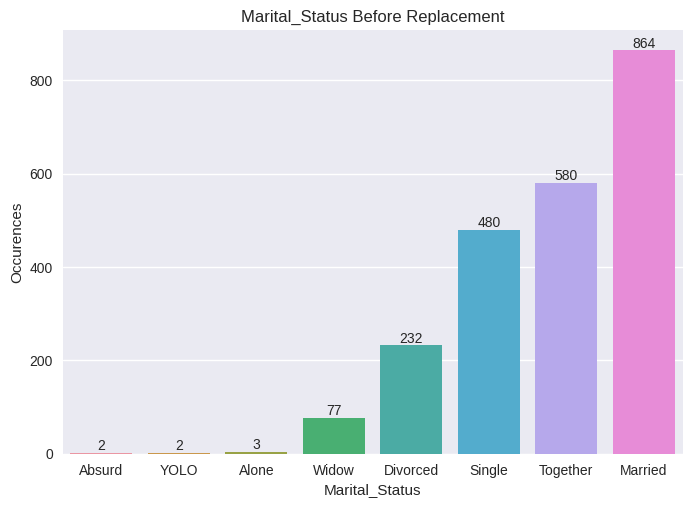

In [ ]:
# Get the unique values
unique_values = df["Marital_Status"].unique()
# Find for each unique value their occurence
occurences = df["Marital_Status"].value_counts()[unique_values]

print("We have ",occurences["Single"], "people with Marital_Status «Single»\n")
# Make a countplot
countplot(df["Marital_Status"], ["Occurences"], True, True, "Marital_Status Before Replacement")

We have  487 people with Marital_Status «Single»



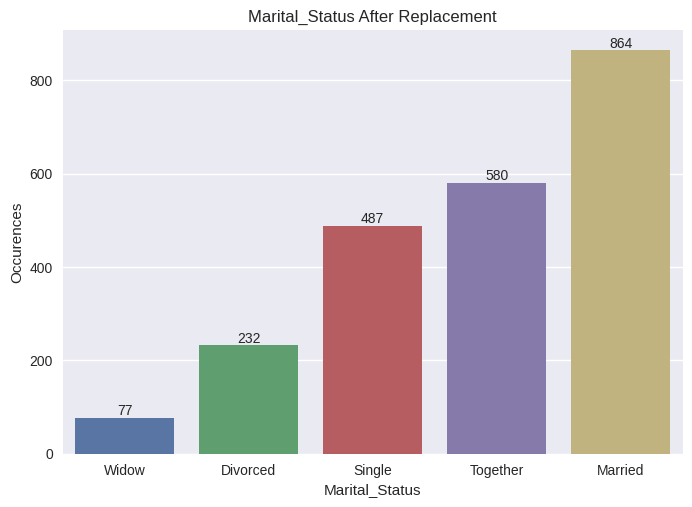

In [ ]:
# We replace the given words and we processed by doing the same as before
df = df.replace(["Alone", "Absurd", "YOLO"], "Single")
unique_values = df["Marital_Status"].unique()
occurences = df["Marital_Status"].value_counts()[unique_values]
print("We have ",occurences["Single"], "people with Marital_Status «Single»\n")

countplot(df["Marital_Status"], ["Occurences"], True, True, "Marital_Status After Replacement")

Based on the messages presented by the number of people who are in the «Single» category and the number in the top values in the bar plot, it is obvious that the replacement took effect.

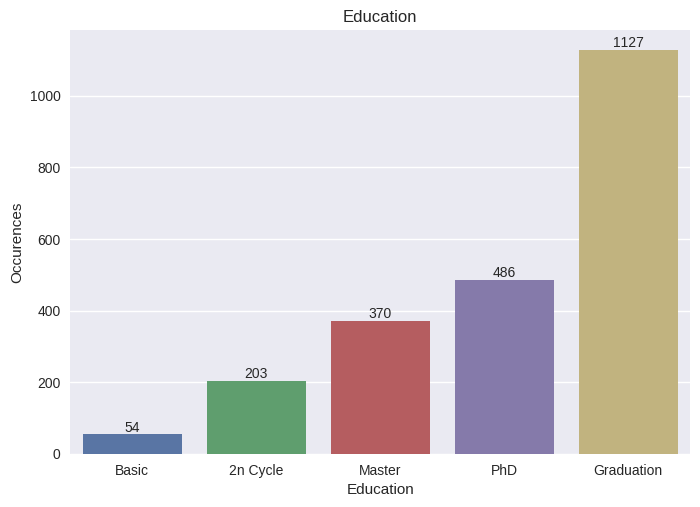

In [ ]:
unique_values = df["Education"]
occurences = df["Education"].value_counts()[unique_values]

countplot(df["Education"], ["Occurences"], True, True, "Education")

## 3. **Create new features: (10%)**


# <u> **Question 3** </u><br>

# Add new column function
All of the following questions needs to add a new column to the data frame. In order to check that the column is added I'm also printing some elements. In order to avoid writing those 2 commands over and over again I preferred to make a function.

In [ ]:
def add_feature(df, name, values):
  df[name] = values
  print(df[name])

## A. Create an attribute ("Customer_For") that represents the number of days customers started shopping at the store relative to the last recorded date (Recency).

In [ ]:
values = ((pd.to_datetime(datetime.now().date()) - pd.to_timedelta(df["Recency"], unit = "d")) - df["Dt_Customer"]).dt.days
add_feature(df, "Customer_For", values)

0       3828
1       3298
2       3509
3       3336
4       3290
        ... 
2235    3558
2236    3186
2237    3287
2238    3371
2239    3805
Name: Customer_For, Length: 2240, dtype: int64


## B. Extract the **"Age"** of a customer based on **"Year_Birth"** indicating the corresponding person's year of birth.

In [ ]:
add_feature(df, "Age", date.today().year - df["Year_Birth"])

0       66
1       69
2       58
3       39
4       42
        ..
2235    56
2236    77
2237    42
2238    67
2239    69
Name: Age, Length: 2240, dtype: int64


## C. Create another attribute **"Spent"** that indicates the total amount spent by the customer in all categories over two years.


In [ ]:
add_feature(df, "Spent", df["MntWines"] + df["MntFruits"] + df["MntMeatProducts"]
            +df["MntFishProducts"]+df["MntSweetProducts"]+df["MntGoldProds"])

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Spent, Length: 2240, dtype: int64


## D. Create an attribute **"Children"** to indicate the total number of children in a household, i.e. children and teenagers.

In [ ]:
add_feature(df, "Children", df["Kidhome"] + df["Teenhome"])

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Children, Length: 2240, dtype: int64


## E. To further clarify the household, create an attribute labeled **"Family_Size"** that shows the total number of people in a household

In [ ]:
values = []
for (status,kids_teens) in zip(df["Marital_Status"], df["Children"]):
  if status == "Married" or status == "Together":
    values.append(2+kids_teens)
  else:
    values.append(1+kids_teens)

add_feature(df, "Family_Size", values)

0       1
1       3
2       2
3       3
4       3
       ..
2235    3
2236    5
2237    1
2238    3
2239    4
Name: Family_Size, Length: 2240, dtype: int64


## St. Create an **"Is_Parent"** attribute that indicates whether a client is also a parent

In [ ]:
values = []
for (kid,teen) in zip(df["Kidhome"], df["Teenhome"]):
  if kid > 0 or teen > 0:
    values.append(True)
  else:
    values.append(False)

add_feature(df, "Is_Parent", values)

0       False
1        True
2       False
3        True
4        True
        ...  
2235     True
2236     True
2237    False
2238     True
2239     True
Name: Is_Parent, Length: 2240, dtype: bool


## G. Create another attribute **"Living_With"** using **"Marital_Status"** to extract the couples living status. Specifically, this attribute must have two values, "Partner" and "Alone".

In [ ]:
values = []
for status in df["Marital_Status"]:
  if status == "Married" or status == "Together":
    values.append("Partner")
  else:
    values.append("Alone")

add_feature(df, "Living_With", values)

0         Alone
1         Alone
2       Partner
3       Partner
4       Partner
         ...   
2235    Partner
2236    Partner
2237      Alone
2238    Partner
2239    Partner
Name: Living_With, Length: 2240, dtype: object


## H. Create the “Age Group” column using the “Age” column, which groups the ages into the following values "21-30","31-40", "41-50", "51-60" , "61-70", "71-80", ">80".

In [ ]:
values = []
for age in df["Age"]:
  if age>= 21 and age <=30:
    values.append("21-30")
  elif age>= 31 and age <=40:
    values.append("31-40")
  elif age>= 41 and age <=50:
    values.append("41-50")
  elif age>= 51 and age <=60:
    values.append("51-60")
  elif age>= 61 and age <=70:
    values.append("61-70")
  elif age>= 71 and age <=80:
    values.append("71-80")
  elif age>=81:
    values.append(">80")

add_feature(df, "Age Group", values)

0       61-70
1       61-70
2       51-60
3       31-40
4       41-50
        ...  
2235    51-60
2236    71-80
2237    41-50
2238    61-70
2239    61-70
Name: Age Group, Length: 2240, dtype: object


## 4. Check for **outliers** in the features and delete them from the data. **(5%)**

In [ ]:
def clean_from_outliers(df, column_name, lower, upper):
  return df[(df[column_name] >= lower) & (df[column_name] <= upper)]

In [ ]:
# This function loops over the column_name list
# For every column it performs the Z-Score methods to eliminate outliers
# With the help of the function clean_from_outliers
# Which given a lower and upper bound and a column it takes only the rows which
# Inside the given range
# At last it also prints the number of data which are remove in every iteration
def clean_columns(df, column_name):
  temp_df = df.loc[:, column_name]
  for column in temp_df:
    upper_bound = df[column].mean() + 3 * df[column].std()
    lower_bound = df[column].mean() - 3 * df[column].std()
    old_len = len(df)
    df = clean_from_outliers(df, column, lower_bound, upper_bound)
    new_len = len(df)
    print(f"Removing outliers based on column \"{column}\"")
    print("old data:", old_len)
    print("new data:", new_len)
    print("removed:", old_len - new_len ,end = "\n\n")
  return df

In [ ]:
labels = df.columns.tolist()
result = ["Income"] + labels[labels.index("MntWines"):labels.index("NumWebVisitsMonth")+1] + ["Age"]
df = clean_columns(df, result)

Removing outliers based on column "Income"
old data: 2240
new data: 2232
removed: 8

Removing outliers based on column "MntWines"
old data: 2232
new data: 2217
removed: 15

Removing outliers based on column "MntFruits"
old data: 2217
new data: 2153
removed: 64

Removing outliers based on column "MntMeatProducts"
old data: 2153
new data: 2104
removed: 49

Removing outliers based on column "MntFishProducts"
old data: 2104
new data: 2053
removed: 51

Removing outliers based on column "MntSweetProducts"
old data: 2053
new data: 1993
removed: 60

Removing outliers based on column "MntGoldProds"
old data: 1993
new data: 1944
removed: 49

Removing outliers based on column "NumDealsPurchases"
old data: 1944
new data: 1916
removed: 28

Removing outliers based on column "NumWebPurchases"
old data: 1916
new data: 1916
removed: 0

Removing outliers based on column "NumCatalogPurchases"
old data: 1916
new data: 1873
removed: 43

Removing outliers based on column "NumStorePurchases"
old data: 1873
n

## 5. Next, examine the **correlation between features** with a heatmap diagram. (Excluding categorical features at this point) **(5%)**

I'm going to drop all columns that are not numeric "int64", "float64".

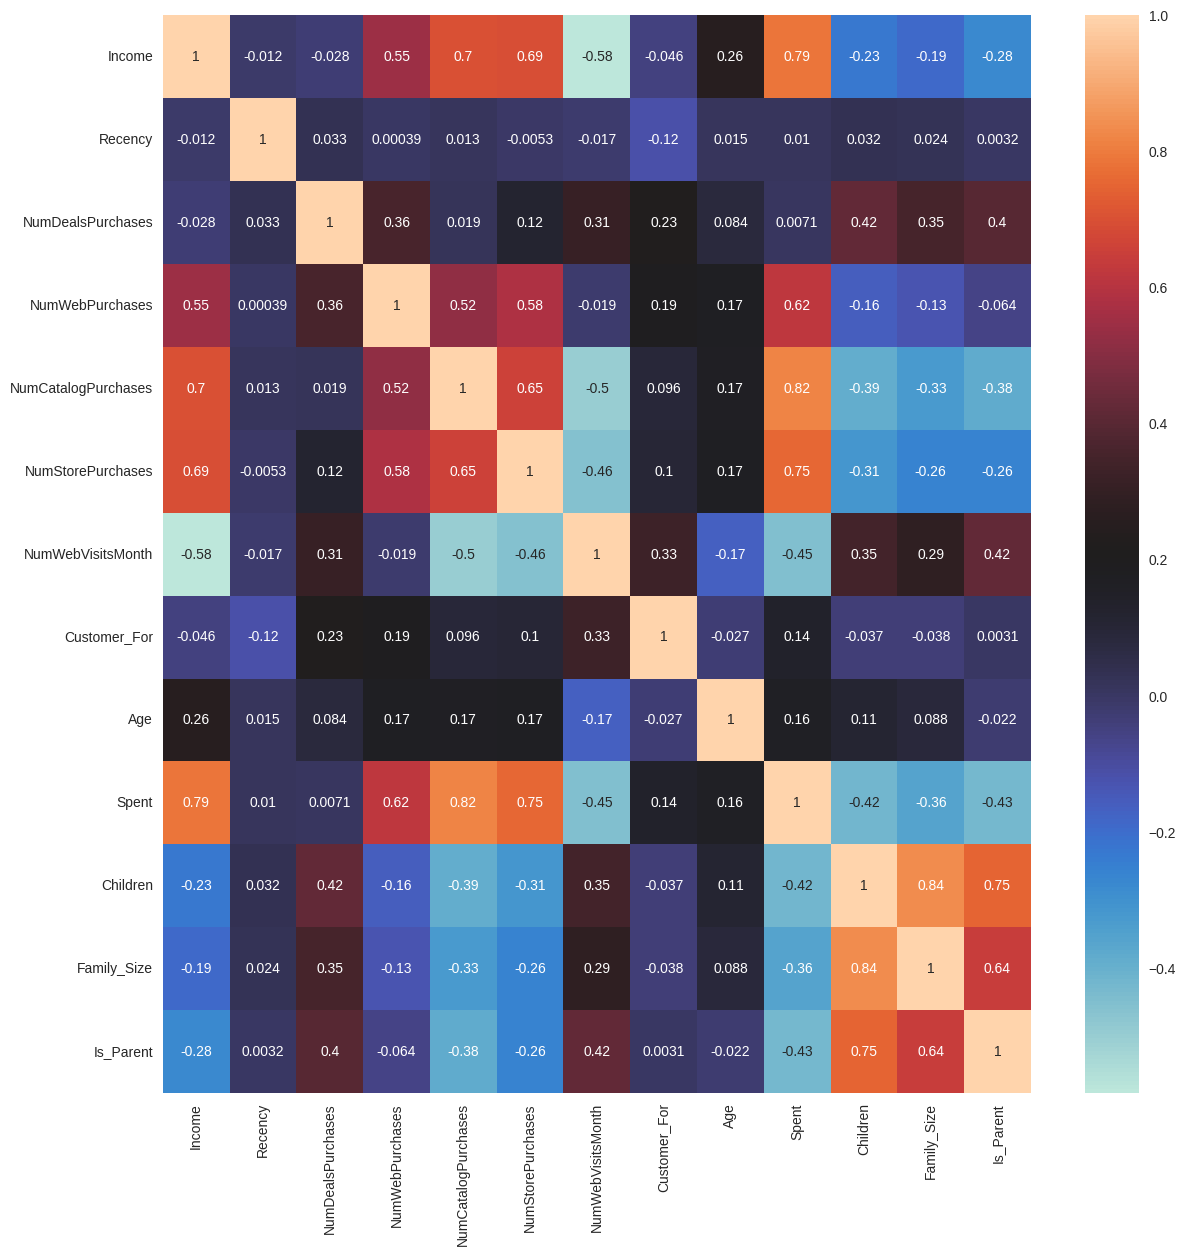

In [ ]:
# I prefer to make a heatmap with the values that was the most import
# Becuase we had many «trash» columns like «ID»
heatmap_df = df[
    ["Income",
    "Recency",
    "NumDealsPurchases",
    "NumWebPurchases",
    "NumCatalogPurchases",
    "NumStorePurchases",
    "NumWebVisitsMonth",
    "Customer_For",
    "Age",
    "Spent",
    "Children",
    "Family_Size",
    "Is_Parent"]
]

plt.figure(figsize = (14,14))
sns.heatmap(heatmap_df.corr(), annot = True, cmap = "icefire")
plt.show()

## 6. Questions to be answered with **graphs**. **(20%)**






1. ### In which Marital_Status category does the largest percentage of the company's customers belong?

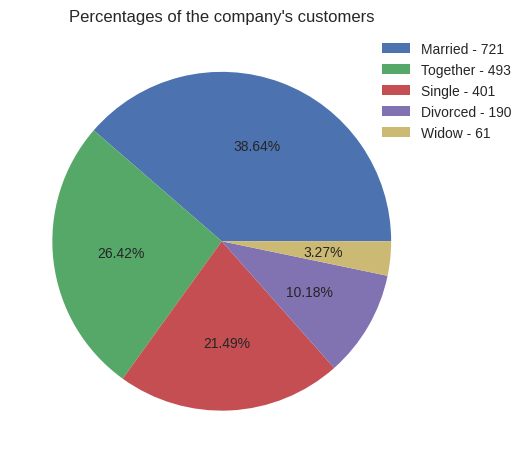

In [ ]:
occurences = df["Marital_Status"].value_counts()
pie_chart(occurences, occurences.index, True, True, "Percentages of the company's customers")

2. ### How many customers have complained?

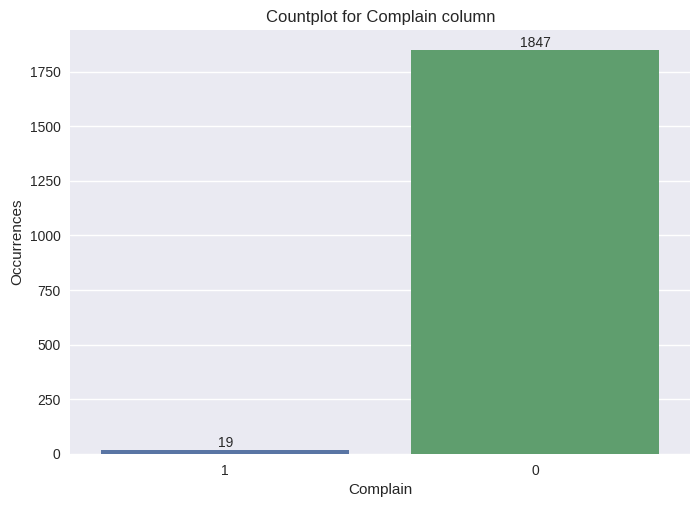

In [ ]:
countplot(df["Complain"], ["Occurrences"], True, False, "Countplot for Complain column")

3. ### Relationship between Number of Purchases Spent and Marital Status.

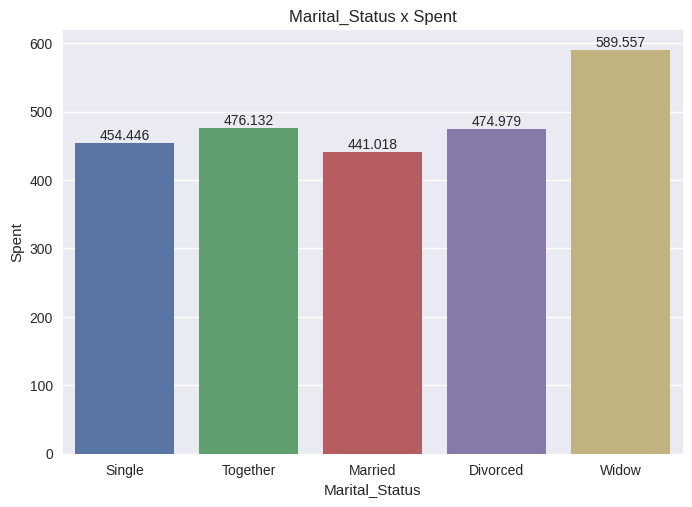

In [ ]:
bar_chart([df["Marital_Status"],df["Spent"]], None, True, "Marital_Status x Spent")

4. ### The relationship between the number of purchases Spent and the number of children and family size.

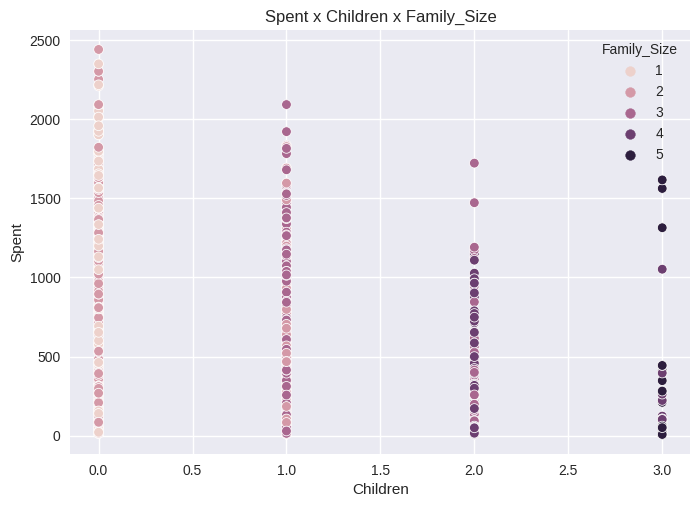

In [ ]:
scatterplot([df["Children"],df["Spent"]], df["Family_Size"], True, "Spent x Children x Family_Size")

5. ### What does Age Group have to do with the Spent feature of shopping?

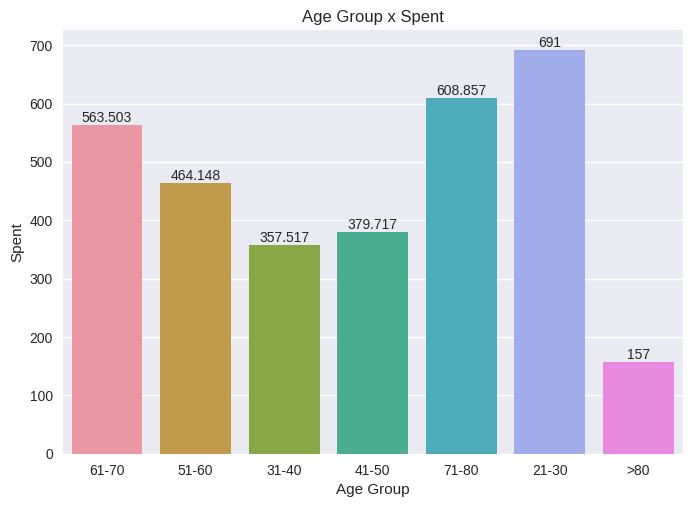

In [ ]:
bar_chart([df["Age Group"],df["Spent"]], None, True, "Age Group x Spent")

6. ### What does Income have to do with the Spent attribute of markets?

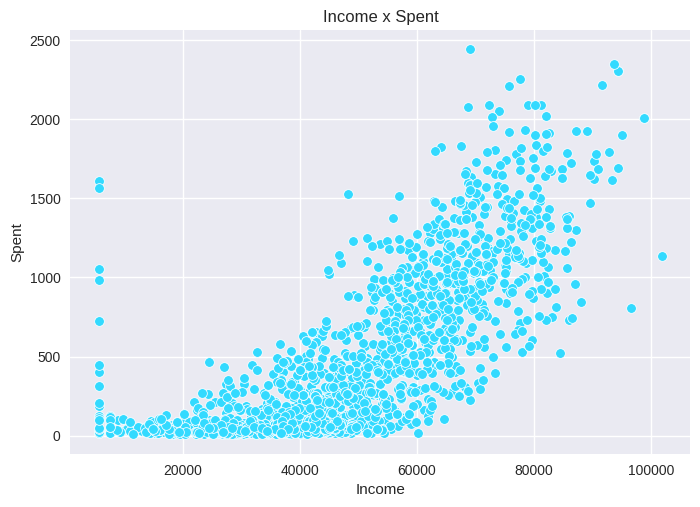

In [ ]:
scatterplot([df["Income"],df["Spent"]], None, True, "Income x Spent")

7. ### What is the relationship between education and income?

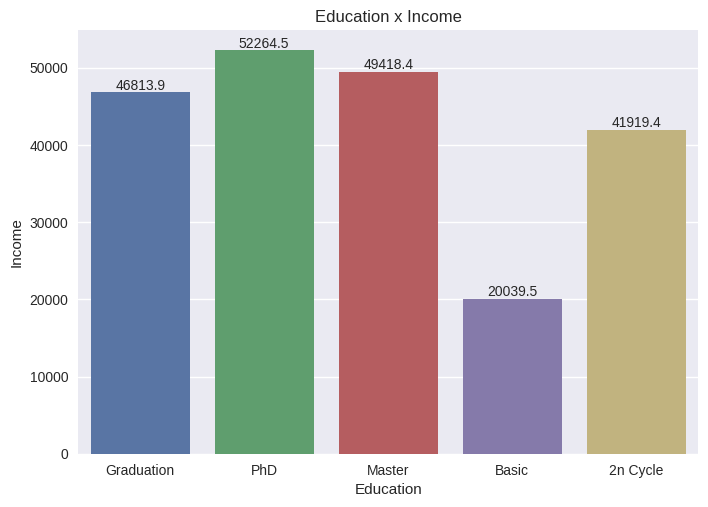

In [ ]:
bar_chart([df["Education"],df["Income"]], None, True, "Education x Income")

8. ### What is the relationship between income and family size?

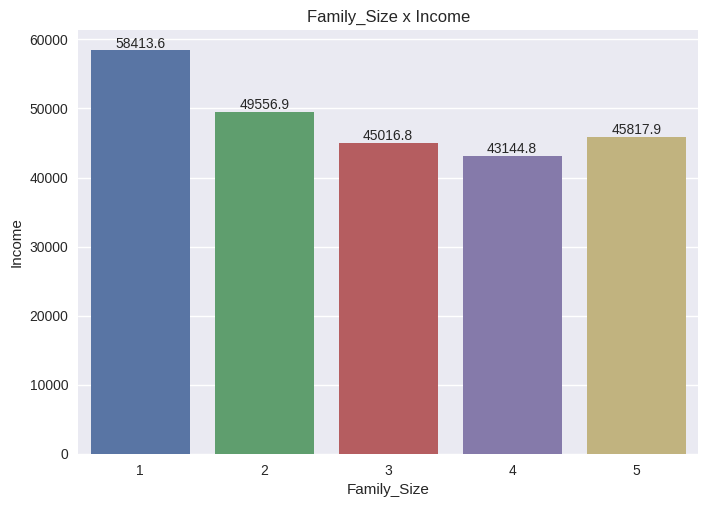

In [ ]:
bar_chart([df["Family_Size"],df["Income"]], None, True, "Family_Size x Income")

9. ### What is the relationship between income and number of children?

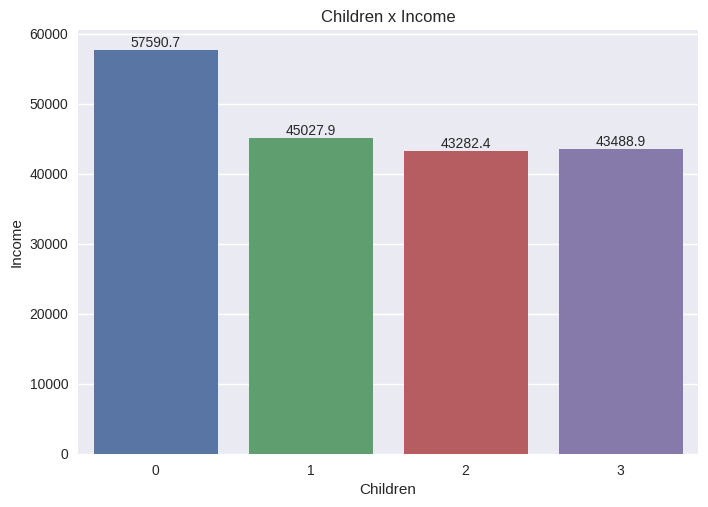

In [ ]:
bar_chart([df["Children"],df["Income"]], None, True, "Children x Income")

10. ### What is the relationship between income and Living_With?

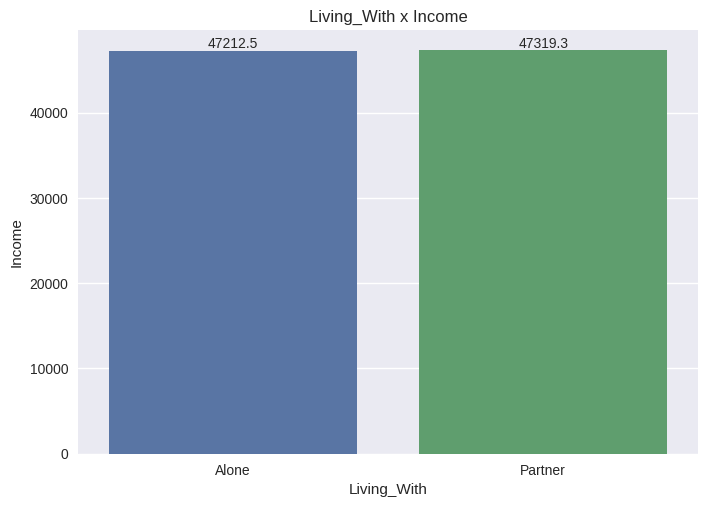

In [ ]:
bar_chart([df["Living_With"],df["Income"]], None, True, "Living_With x Income")

11. ### What is the relationship between the income and the Spent number of purchases?

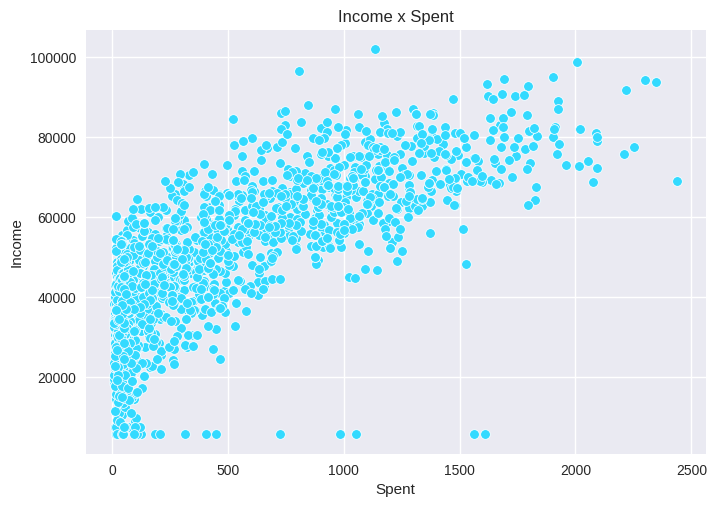

In [ ]:
scatterplot([df["Spent"],df["Income"]],  None, True, "Income x Spent")

12. ### What is the relationship between the number of purchases from the website and the number of visits to the website?

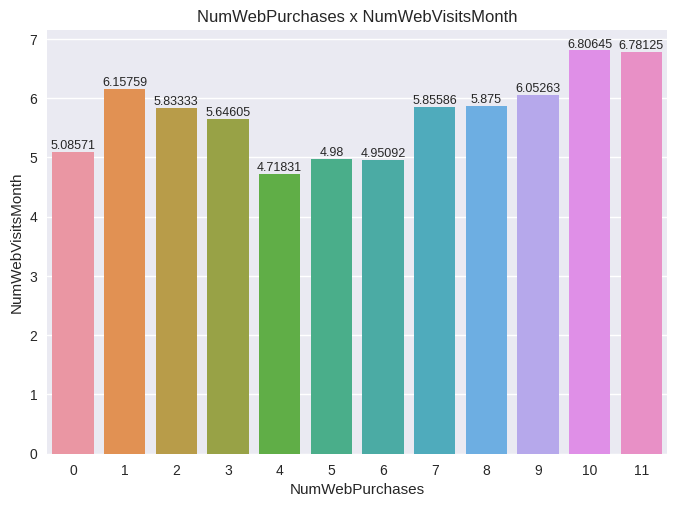

In [ ]:
bar_chart([df["NumWebPurchases"],df["NumWebVisitsMonth"]], 9, True, "NumWebPurchases x NumWebVisitsMonth")

13. ### What is the percentage of customers who accept all offers from the store?

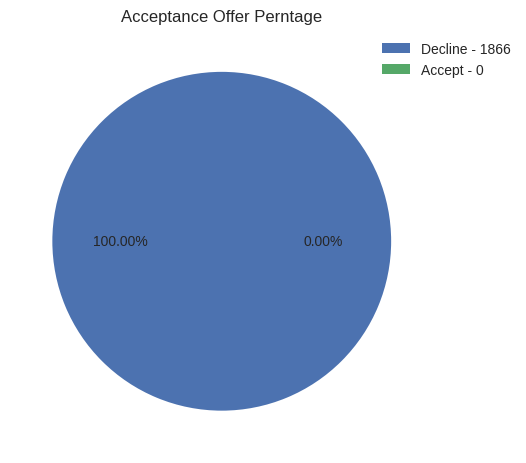

In [ ]:
accept_all = 0
decline_some = 0
for i in (df["AcceptedCmp1"] + df["AcceptedCmp2"] + df["AcceptedCmp3"] +
          df["AcceptedCmp4"] + df["AcceptedCmp5"] + df["Response"]):
  if i == 6:
    accept_all += 1
  else:
    decline_some += 1

pie_chart([accept_all,decline_some], ["Accept", "Decline"], True, True, "Acceptance Offer Perntage")

14. ### Draw the histogram for the NumDealsPurchases column.

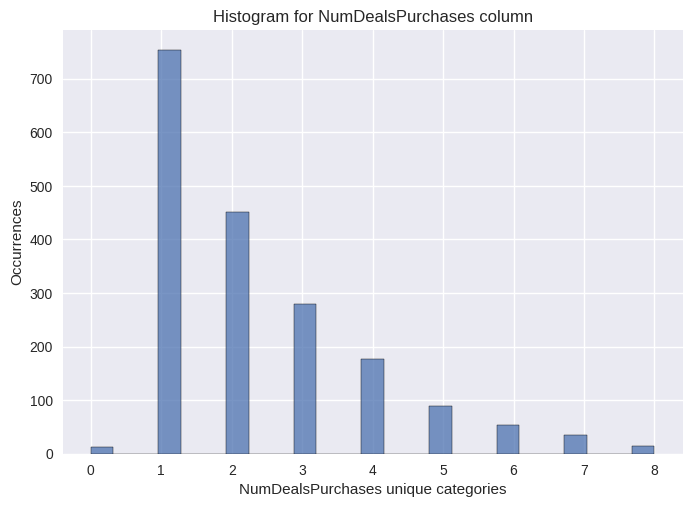

In [ ]:
histogram(df["NumDealsPurchases"], ["NumDealsPurchases unique categories", "Occurrences"], True,
          "Histogram for NumDealsPurchases column")

15. ### Draw the histogram for the Income column.

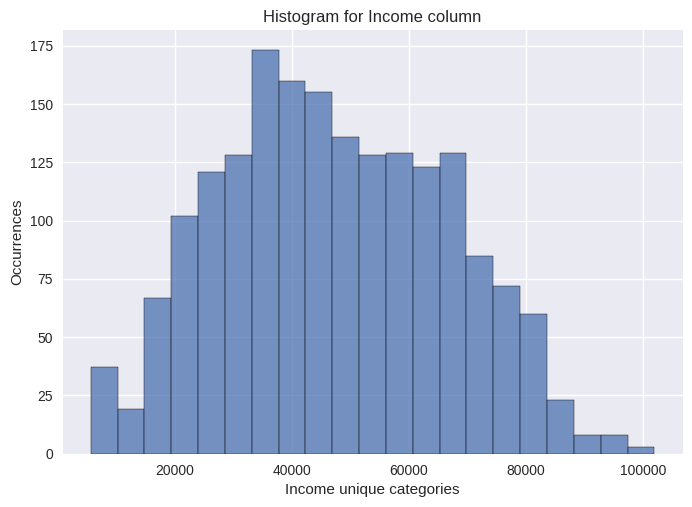

In [ ]:
histogram(df["Income"], ["Income unique categories", "Occurrences"], True,
          "Histogram for Income column")

16. ### Draw the histogram for the Kidhome column.

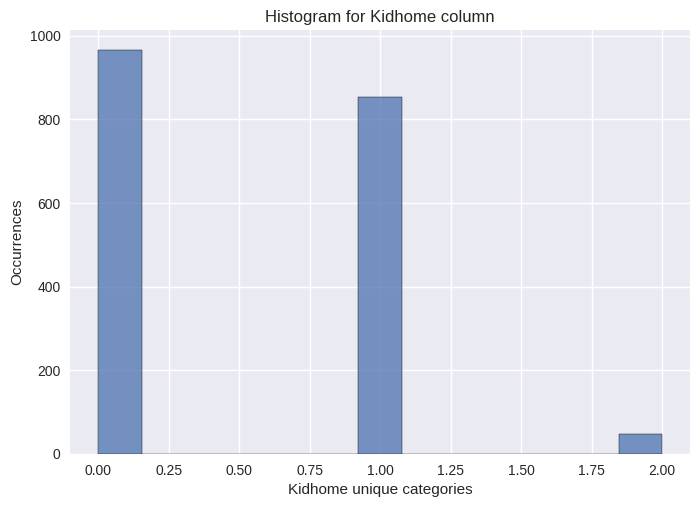

In [ ]:
histogram(df["Kidhome"], ["Kidhome unique categories", "Occurrences"], True,
          "Histogram for Kidhome column")

17. ### Draw the histogram for the Family_Size column.

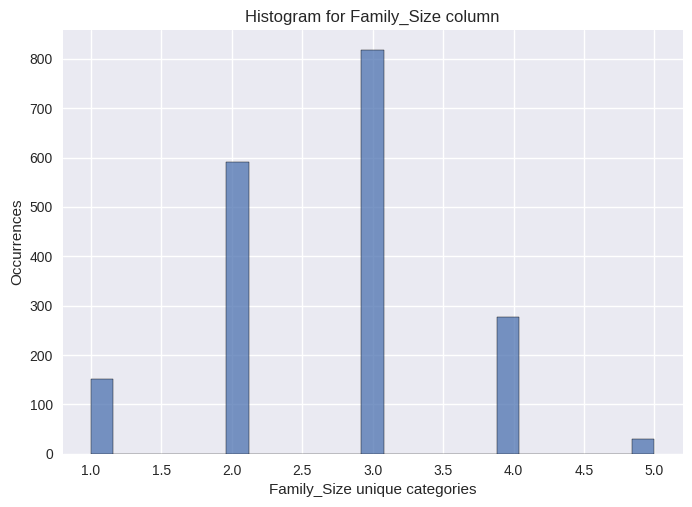

In [ ]:
histogram(df["Family_Size"], ["Family_Size unique categories", "Occurrences"], True,
          "Histogram for Family_Size column")

18. ### Do customers with master degrees spend more money on wine?

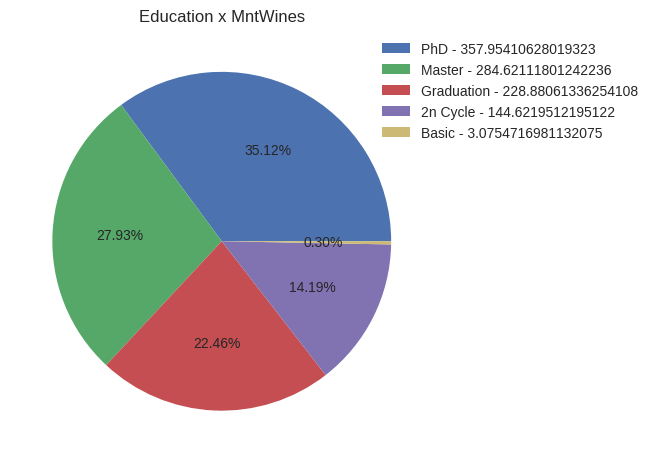

In [ ]:
grouped_df = df.groupby('Education')['MntWines'].mean()
pie_chart(grouped_df, grouped_df.index, True, True, "Education x MntWines")

## 7. **Principal component analysis (PCA) (25%):** In this problem, there are many factors on which a classification is made. These factors are key characteristics or traits. The greater the number of features, the more difficult the task. Many of these features are correlated and therefore redundant. This is why you will perform **dimension reduction** on the selected features. Dimensionality reduction is the process of reducing the number of random variables under consideration, and results in obtaining a set of principal variables. The variables in the dataset that are categorical rather than numeric, after the attribute additions made in the previous queries are the following ['Education','Marital_Status','Living_With']. For these variables you will use **LabelEncoder()** to convert them to numeric data (the process is called **one hot encoding**).

In [ ]:
# Creating instance of labelencoder
labelencoder = LabelEncoder()

# Define the columns in which we want to perform label encoding
columns = ["Education", "Marital_Status", "Living_With"]

for column in columns:
  # Assigning numerical values and storing in another column
  df[column+"_Arithmetic"] = labelencoder.fit_transform(df[column])

In [ ]:
# Drop the list of columns that is given as argument
def clean_df_from_offers_and_promotions(df, columns):
  df.drop(columns = columns)

In [ ]:
# Take only numeric columns and make a copy of dataframe
cleaned_df = df.select_dtypes(include = ["int64", "float64"]).copy()

# Clean the data frame from offers, promotions and Z columns as well)
clean_df_from_offers_and_promotions(cleaned_df,
   ["AcceptedCmp3","AcceptedCmp4",
    "AcceptedCmp5",
    "AcceptedCmp1",
    "AcceptedCmp2",
    "Complain",
    "Response","Z_CostContact", "Z_Revenue"])

In [ ]:
# Standardize the data
scaler = StandardScaler()
cleaned_df = scaler.fit_transform(cleaned_df)

In [ ]:
# Perform PCA with n_components = 3
pca = PCA(n_components = 3)
pca_features = pca.fit_transform(cleaned_df)

# Create a dataframe for the PCA
pca_df = pd.DataFrame(data = pca_features, columns = ["PC1", "PC2", "PC3"])

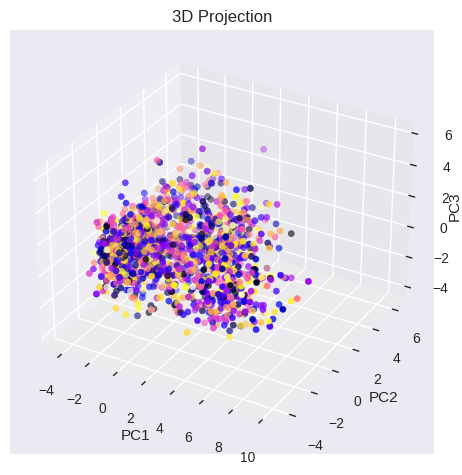

In [ ]:
# Plot the results
ax = plt.axes(projection = "3d")
ax.scatter(pca_df["PC1"], pca_df["PC2"], pca_df["PC3"],
          c = np.arange(len(pca_df)),
          cmap = 'gnuplot2')
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.zaxis.set_rotate_label(False)
ax.set_zlabel("PC3", labelpad=-1, rotation=90)
ax.set_title("3D Projection")
plt.show()

## 8. **Implementation of Clustering (25%)**<br><br>
## <u>Steps</u>
   * ## ELBOW method to determine the number of clusters to form

In [ ]:
# Calculate the score for different K-mean values
def elbow_method(df):
  sse = []
  for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, n_init='auto').fit(df)
    sse.append(kmeans.inertia_)
  line_chart([range(1,10), sse], ["Number of Clusters", "SSE"],  True, "Results of Elbow Method")

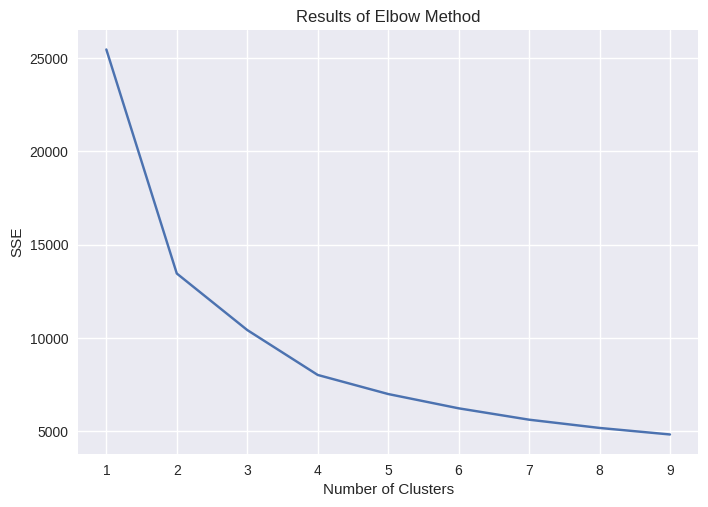

In [ ]:
elbow_method(pca_df)

We notice that the value of k for elbow is 4. From then on, the graph is almost a straight line, which means that the slope difference it quite small. Therefore we do not take it into account and executing Agglomerative and K-Means with `cluster = 4`

In [ ]:
elbow = 4

  * ## Clustering via cumulative clustering (Agglomerative και K-Means)


In [ ]:
# For Agglomerative Clustering
df_agglomerative = pca_df.copy()
agglomerativeclustering = AgglomerativeClustering(n_clusters = elbow).fit(df_agglomerative)

In [ ]:
# For K-Means Clustering
df_kmeans = pca_df.copy()
kmeans = KMeans(n_clusters = elbow, n_init = 'auto').fit(df_kmeans)

  * ## Show the formed clusters through a diagram (eg scatter plot).

In [ ]:
# Make a scatterplot 3d function which given the dataframe, the columns and
# A colormap it makes the plot
def scatter3d(df, labels, cmap):
  ax = plt.axes(projection = "3d")
  ax.scatter(df["PC1"], df["PC2"], df["PC3"],
           c = labels,
           cmap = cmap)
  plt.show()

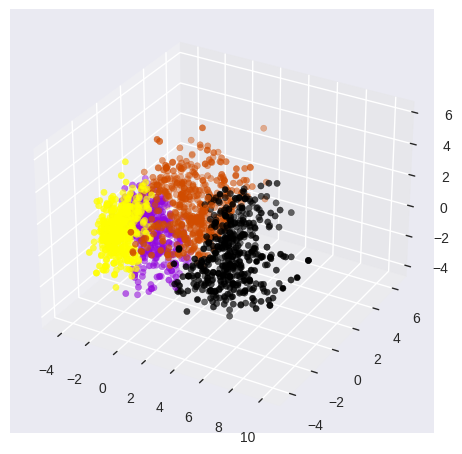

In [ ]:
scatter3d(df_agglomerative, agglomerativeclustering.labels_.astype(float), "gnuplot")

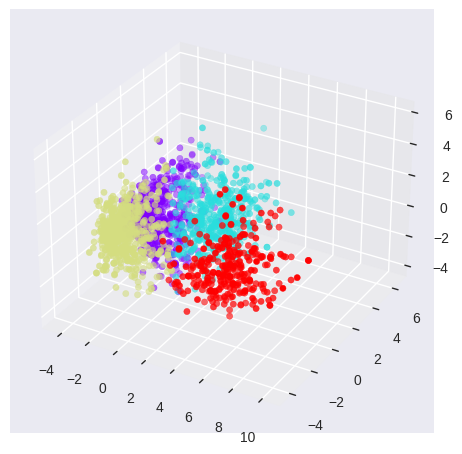

In [ ]:
scatter3d(df_kmeans, kmeans.labels_.astype(float), "rainbow")

We can see that for `elbow = 4` we have a pretty good clustering which is confirmed by the fact that both methods have similar results.

## 9. **Profile of customers (bonus)**<br>
## Try to sketch the profile of the clusters that form through diagrams to reach a conclusion about who is the "important" customer and who needs more attention from the store's marketing team.<br><br>
## To achieve this design some of the features that are indicative of the customer's personal characteristics in light of the cluster they are in (eg Age, Is_Parent, Family_Size etc.). Finally, for each of the clusters gather its main characteristics. Ex<br>


---
## **Cluster 0:**<br>They spend the least<br> They have the lowest income<br>They have teenagers at home<br> They are older
---
## **Cluster 1:**<br>Spend more<br> Have the highest income<br>Most are not parents<br>Actively participated in all 6 promotions
---

In [ ]:
# We first add the cluster number to each record
df["Cluster"] = kmeans.labels_

In [ ]:
# Then we groupby Cluster to make have easy access to data like
# The average income per cluster
# The average spent per cluster etc
cluster_df = df.groupby('Cluster').describe()

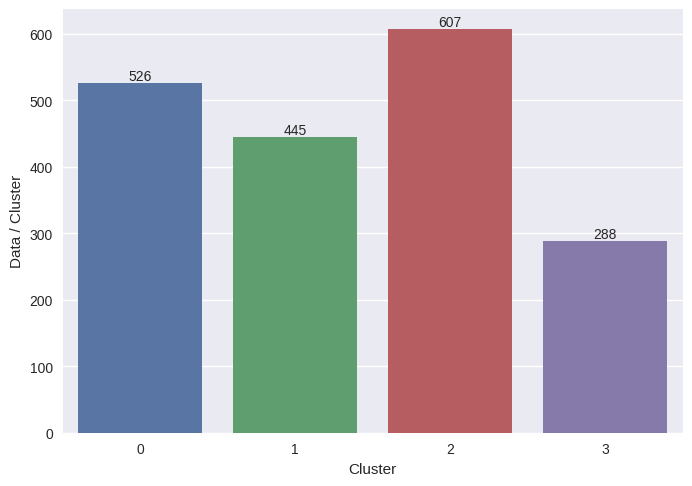

In [ ]:
# To begin the analysis we first present the number of data in each cluster
countplot(df["Cluster"], ["Cluster", "Data / Cluster"], True, None, None)

In [ ]:
# I made a function in which it plots the average value for every column
# In the list columns with two different charts, bar plot and pie plot
# To make things easier to identify the profile of the clients
def plot_columns(df, columns, title):
  for column in columns:
    temp = cluster_df.loc[:, (column,"mean")]
    plt.figure(figsize = (10,5))
    plt.subplot(1, 2, 1)
    bar_chart([temp.index, temp ], None, None, title + column + " / Cluster")
    plt.ylabel(title + column)
    plt.subplot(1, 2, 2)
    pie_chart(temp, temp.index, None, True, title + column + " / Cluster")

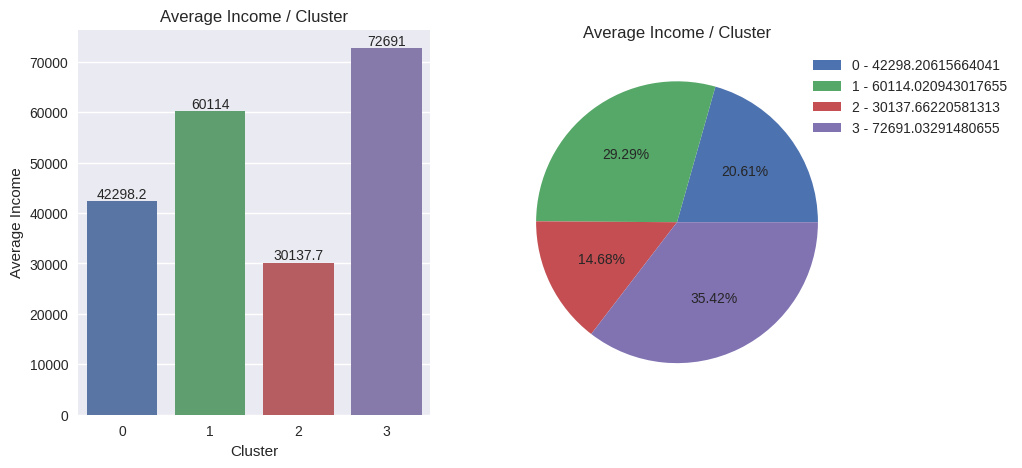

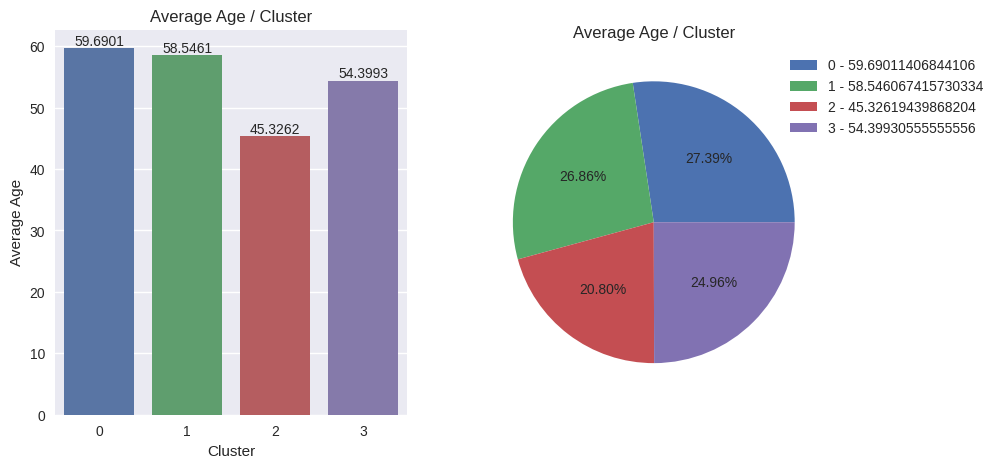

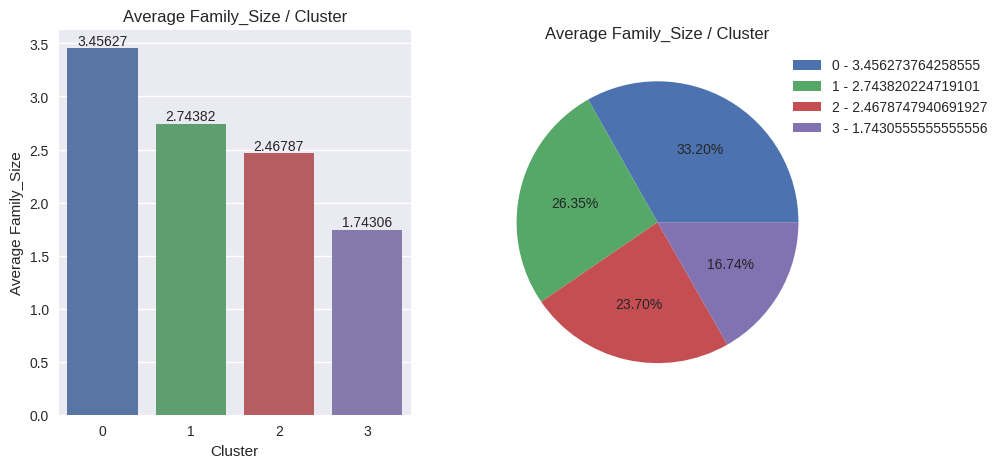

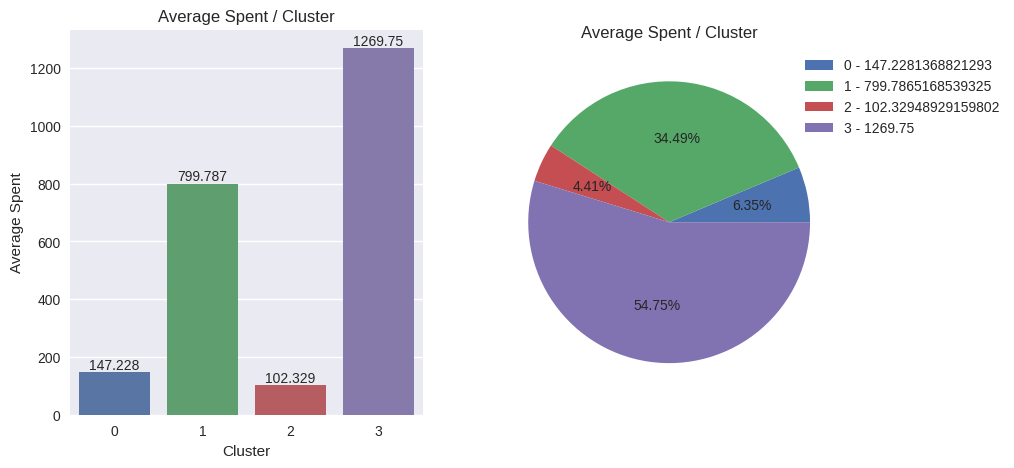

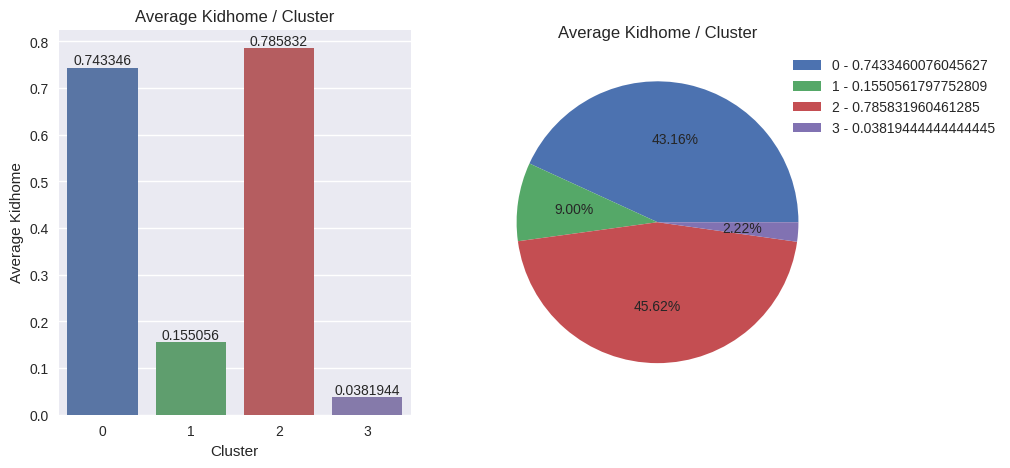

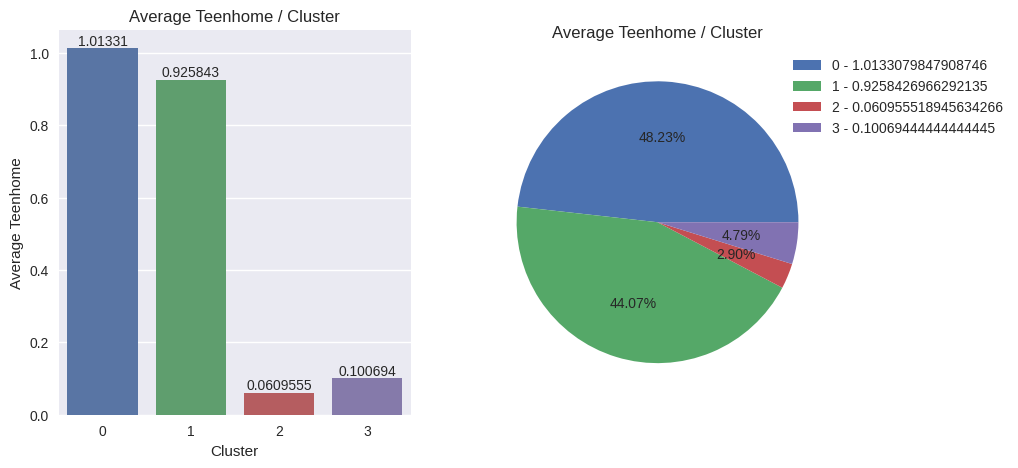

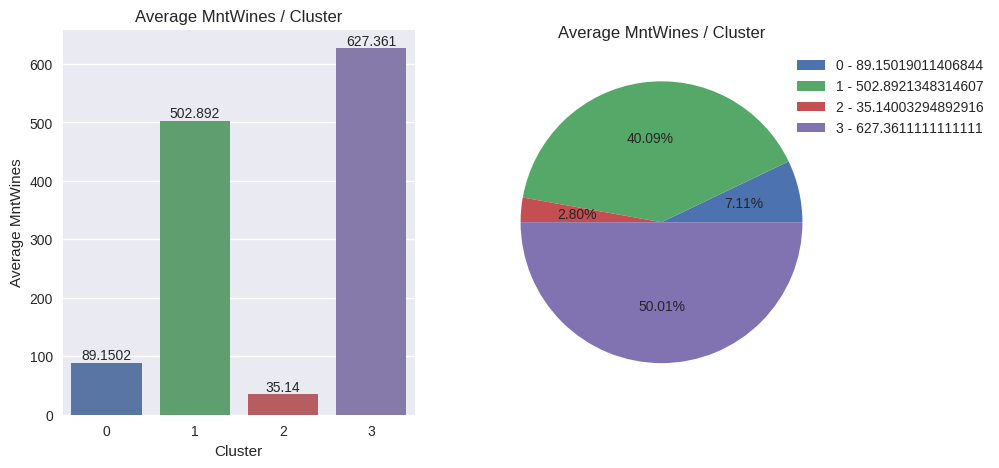

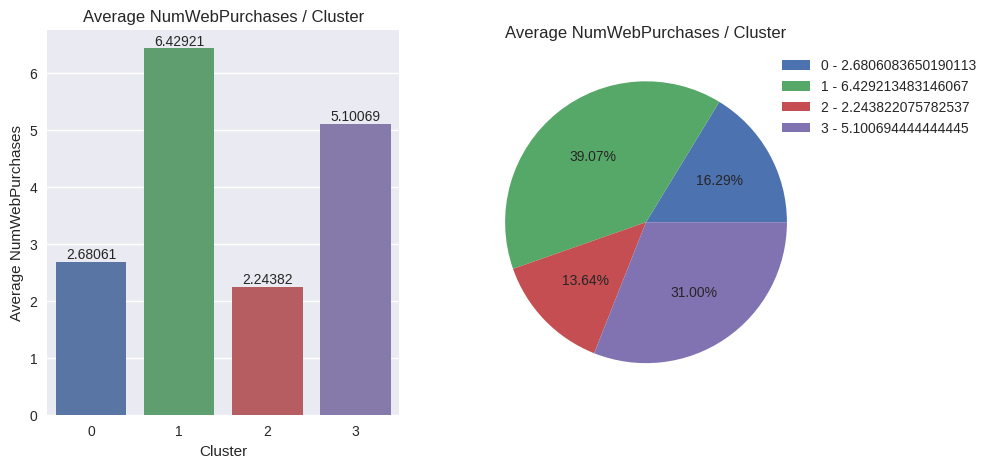

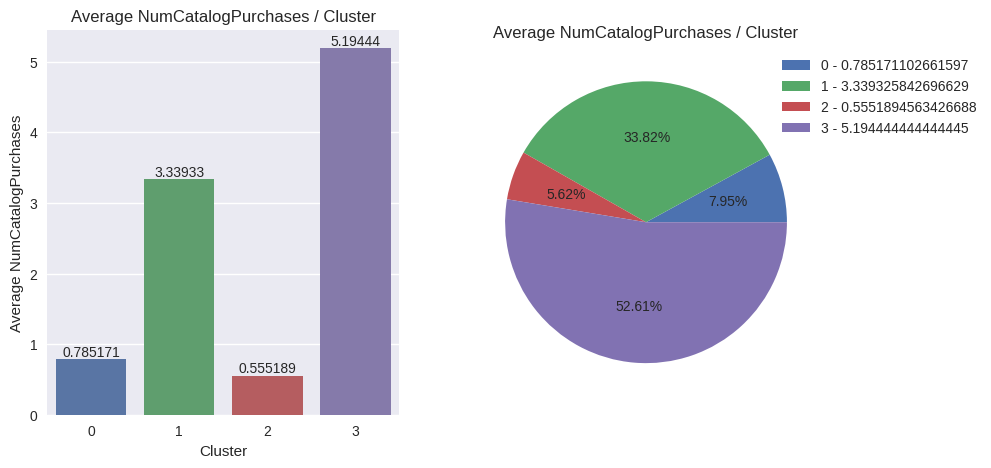

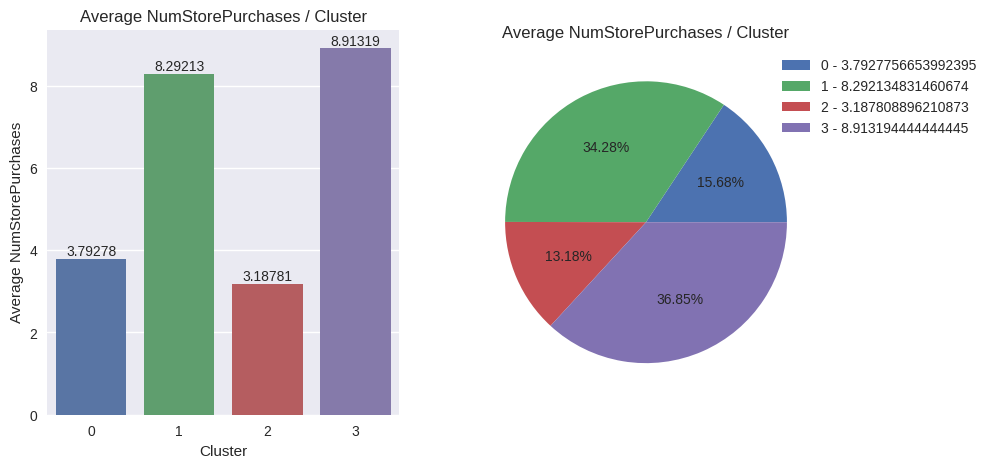

In [ ]:
# We are defining which columns we will use for charts
columns = ["Income",
           "Age",
           "Family_Size",
           "Spent",
           "Kidhome",
           "Teenhome",
           "MntWines",
           "NumWebPurchases",
           "NumCatalogPurchases",
           "NumStorePurchases"]

# We plot them and then we make the observations
plot_columns(cluster_df, columns, "Average ")

---
**Cluster 0: <br>**
* They spend 6% more than those who spend the least<br>
* They are the oldest<br>
* They have the biggest families<br>
* They spend just 1.5% more than those who spend the least<br>
* They usually have 1 child at home<br>
* They usually have 1 teenager at home<br>
* They spend 4% more on wine than those who spend the least<br>
* They usually make 3 purchases via the web<br>
* They usually make 1 purchase through a catalog<br>
* They usually make 4 purchases through a store<br>

---
**Cluster 1:<br>**
* They spend the most<br>
* They are usually up to 54 years old<br>
* They have small families<br>
* They spend the most<br>
* They usually don't have any children at home<br>
* They usually don't have any teenagers at home<br>
* They spend the most on wine<br>
* They usually make 5 web purchases<br>
* They do most of their shopping by catalog<br>
* They do most of their shopping in-store<br>

---
**Cluster 2:<br>**
* They spend 7.5% less than those who spend the most<br>
* Age is up to 58 years old<br>
* His families are 7% larger in relation to those who have children<br>
* Spend 22% less than top spenders<br>
* They usually don't have any children at home<br>
* They usually have 1 teenager at home<br>
* Spend 12% less on wine than top spenders<br>
* They do most of their shopping online<br>
* They usually make 3 catalog purchases<br>
* They usually make 8 purchases through a store<br>

---
**Cluster 3:<br>**
* They spend the least<br>
* They are the youngest in age<br>
* His families are 7% smaller in relation to those who have the largest ones<br>
* They spend the least<br>
* They usually have 1 child at home<br>
* They usually don't have any teenagers at home<br>
* They spend the least on wine<br>
* They make the fewest purchases online<br>
* They do most of their shopping by catalog<br>
* They make the fewest purchases through a store<br>

---
Finally, we can conclude that the most important customers are those belonging to Cluster 1.